This tutorial has been taken from this [Towards Data Science blog](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

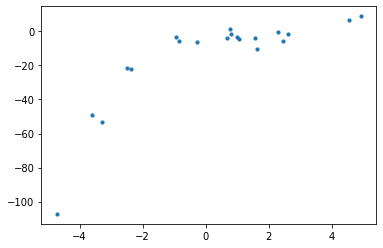

In [12]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x, y, s=10)
plt.show()

Let's first apply linear regression model to this dataset.

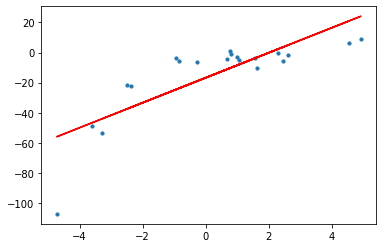

In [13]:
from sklearn.linear_model import LinearRegression

# Transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(rmse)
print(r2)

15.908242501429998
0.6386750054827146


As we can see, the model underfits the data and even performs poorly on RMSE and R2 score metrics.

In [16]:
# Polynomial regression
import operator
from sklearn.preprocessing import PolynomialFeatures

10.120437473614711
0.8537647164420812


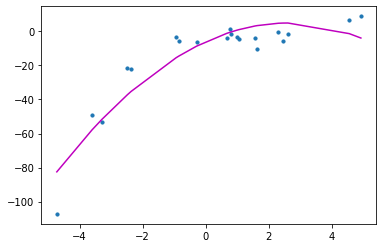

In [17]:
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

We can see that RMSE has decreased and R2 score has increased as compared to the linear line.

3.449895507408724
0.9830071790386679


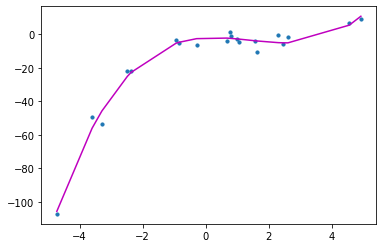

In [21]:
# With degree 3
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()

polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()